# 10월 13일 프로젝트: 대한민국은 코로나에 잘 대응하였는가?

# 문제1 - covid-19의 데이터 입수

## Kaggle - Coronavirus (COVID-19) Visualization & Prediction에서 데이터 가져오기
- https://www.kaggle.com/therealcyberlord/coronavirus-covid-19-visualization-prediction/notebook

In [1]:
# 해당 사이트에서 데이터를 불러오는 코드를 제공하고 있음
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time

confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
# recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')


/Users/mullung/opt/miniconda3/envs/ds_study/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
# 누적 확진자 데이터
confirmed_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  10/2/21  10/3/21  10/4/21  \
0        0        0        0        0  ...   155191   155191   155287   
1        0        0        0        0  ...   171327   171794   171794   
2        0        0        0        0  ...   203657   203789   203915   
3        0        0        0        0  ...    15222    15222    15267   
4        0        0        0        0  ...    58603    58943    58943   

   10/5/21  10/6/21  10/7/21  10/8/21  10/9/21  10/10/21  10/11/21  
0   155309   155380   155429   155448   155466    155508    155540  
1   172618   173190   173723   174168   174643    174968    175163  
2   204046   204171   204276   204388   204490    204597    204695  
3    15271    15284    15288    15291    15291     15291     15307  
4    59895    60448    60803    61023    61245     61378     61580  

[5 rows x 633 columns]

In [3]:
# 앞의 4개 컬럼을 제외하면 279개 나라별 629일의 누적 확진자 데이터가 있다
confirmed_df.shape

(279, 633)

In [4]:
# 일자별 누적 사망자 데이터
deaths_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  10/2/21  10/3/21  10/4/21  \
0        0        0        0        0  ...     7206     7206     7212   
1        0        0        0        0  ...     2710     2713     2713   
2        0        0        0        0  ...     5819     5822     5826   
3        0        0        0        0  ...      130      130      130   
4        0        0        0        0  ...     1574     1577     1577   

   10/5/21  10/6/21  10/7/21  10/8/21  10/9/21  10/10/21  10/11/21  
0     7214     7220     7221     7221     7221      7225      7228  
1     2725     2734     2746     2753     2759      2768      2777  
2     5831     5838     5843     5846     5850      5853      5855  
3      130      130      130      130      130       130       130  
4     1587     1598     1603     1613     1618      1622      1629  

[5 rows x 633 columns]

In [5]:
# 앞의 4개 컬럼을 제외하면 279개 나라별 629일의 누적 사망자 데이터가 있다
deaths_df.shape 

(279, 633)

# 문제2 - 5개 국가를 선택하여 하나의 데이터로 만들기
- 우리나라 포함, 우리나라와 비슷하거나 선진국 기준
- 앞으로 '전체 데이터'라고 명명
- 중국은 제외
- OECD 상위 3개국가(중국 제외) + 대한민국보다 GDP 순위가 한단계 위인 국가 선택 - 미국, 일본, 독일, 이탈리아

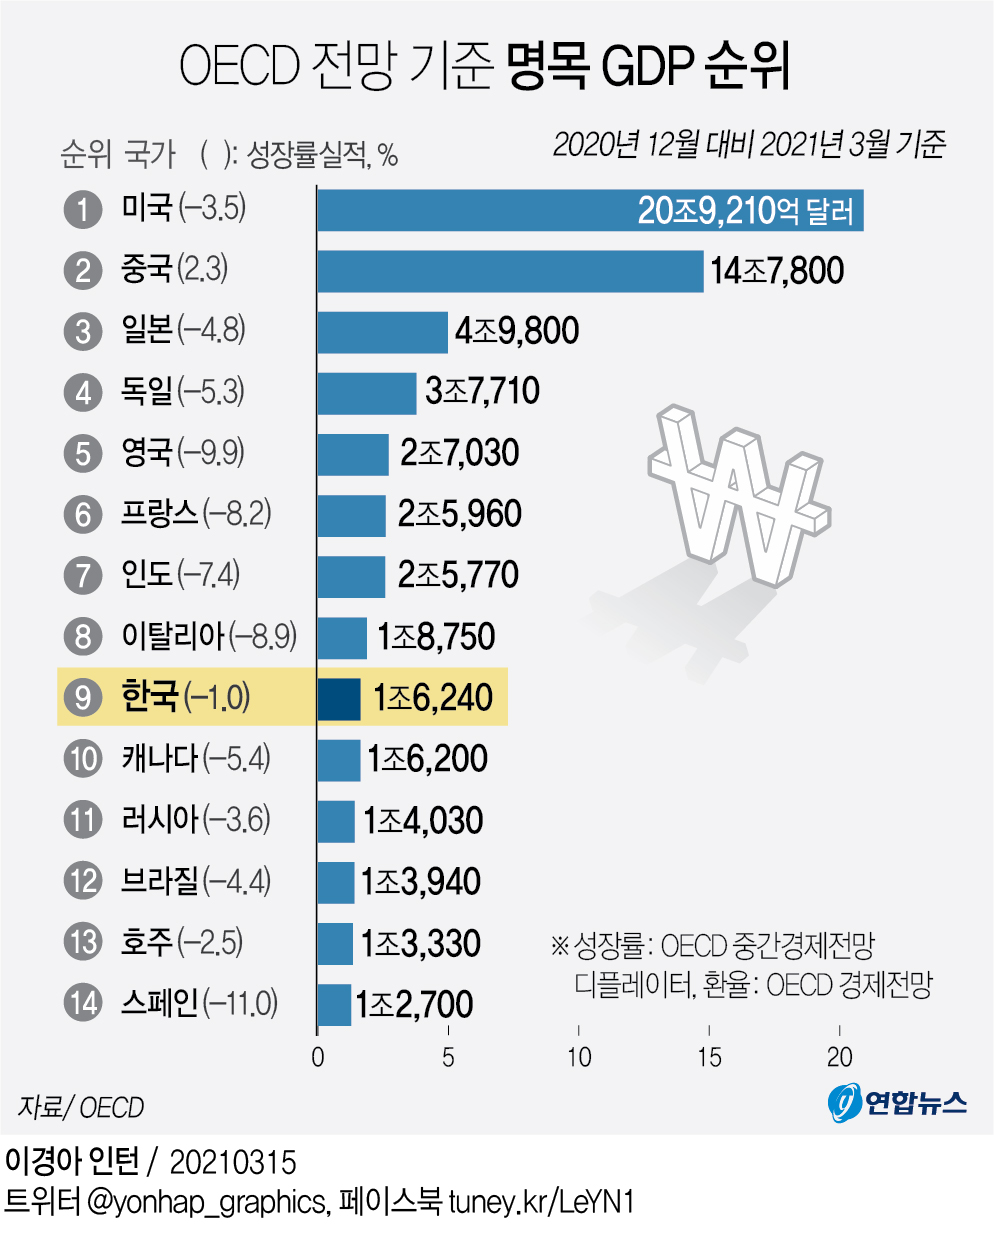

In [6]:
# OECD의 명목 GDP 순위
from IPython.display import Image
Image('https://img3.yna.co.kr/etc/graphic/YH/2021/03/15/GYH2021031500050004400_P4.jpg', width = 400, height = 500)

In [7]:
# 데이터에서 정확한 국가명을 확인하기 위해 'Country/Region' 컬럼 확인
confirmed_df['Country/Region'].values

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Australia', 'Australia', 'Australia', 'Australia', 'Australia',
       'Australia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada',
       'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada',
       'Canada', 'Canada', 'Canada', 'Central African Republic', 'Chad',
       'Chile', 'China', 'China', 'China', 'China', 'China', 'China',
       'China', 'China', 'China', 'China', 'China', 'China', 'China',
       'China', 'China', 'China', 'China', 'China', 'China', 'China',
       'China', 'China', 'Chi

In [8]:
target_country = ["Korea, South", 'US', 'Japan', 'Germany','Italy'] # 5개 국가 선택(대한민국, 미국, 일본, 독일, 이탈리아)

In [9]:
# 누적확진자 전체 데이터 만들기
confirmed_df.set_index('Country/Region', inplace=True) # Country/Region 컬럼을 인덱스로 바꾸고
total_confirmed_df = confirmed_df.loc[confirmed_df.index.isin(target_country),'1/22/20':] # 5개 국가 및 날짜 데이터만 선택
total_confirmed_df = total_confirmed_df.transpose() # 행/렬 전환
total_confirmed_df.index = pd.to_datetime(total_confirmed_df.index, format='%m/%d/%y') # 인덱스를 날짜타입으로 전환
total_confirmed_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 629 entries, 2020-01-22 to 2021-10-11
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Germany       629 non-null    int64
 1   Italy         629 non-null    int64
 2   Japan         629 non-null    int64
 3   Korea, South  629 non-null    int64
 4   US            629 non-null    int64
dtypes: int64(5)
memory usage: 29.5 KB


In [10]:
# 누적사망자 전체 데이터 만들기
deaths_df.set_index('Country/Region', inplace=True) # Country/Region 컬럼을 인덱스로 바꾸고
total_deaths_df = deaths_df.loc[deaths_df.index.isin(target_country),'1/22/20':] # 5개 국가 및 날짜 데이터만 선택
total_deaths_df = total_deaths_df.transpose() # 행/렬 전환
total_deaths_df.index = pd.to_datetime(total_deaths_df.index, format='%m/%d/%y') # 인덱스를 날짜타입으로 전환
total_deaths_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 629 entries, 2020-01-22 to 2021-10-11
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Germany       629 non-null    int64
 1   Italy         629 non-null    int64
 2   Japan         629 non-null    int64
 3   Korea, South  629 non-null    int64
 4   US            629 non-null    int64
dtypes: int64(5)
memory usage: 29.5 KB


In [11]:
# 5개 국가 누적확진자 합계 만들기
total_confirmed_df['Total'] = total_confirmed_df.sum(axis = 1)
total_confirmed_df

Country/Region  Germany    Italy    Japan  Korea, South        US     Total
2020-01-22            0        0        2             1         1         4
2020-01-23            0        0        2             1         1         4
2020-01-24            0        0        2             2         2         6
2020-01-25            0        0        2             2         2         6
2020-01-26            0        0        4             3         5        12
...                 ...      ...      ...           ...       ...       ...
2021-10-07      4295876  4692274  1709603        327976  44158910  55184639
2021-10-08      4305634  4695291  1710426        329925  44290052  55331328
2021-10-09      4312528  4698038  1711207        331519  44317553  55370845
2021-10-10      4318437  4700316  1711756        332816  44339747  55403072
2021-10-11      4323346  4701832  1712127        334163  44455949  55527417

[629 rows x 6 columns]

In [12]:
# 5개 국가 누적사망자 합계 만들기
total_deaths_df['Total'] = total_deaths_df.sum(axis = 1)
total_deaths_df

Country/Region  Germany   Italy  Japan  Korea, South      US   Total
2020-01-22            0       0      0             0       0       0
2020-01-23            0       0      0             0       0       0
2020-01-24            0       0      0             0       0       0
2020-01-25            0       0      0             0       0       0
2020-01-26            0       0      0             0       0       0
...                 ...     ...    ...           ...     ...     ...
2021-10-07        94117  131198  17872          2554  710502  956243
2021-10-08        94182  131228  17918          2560  712339  958227
2021-10-09        94206  131274  17945          2575  712618  958618
2021-10-10        94213  131301  17952          2583  712873  958922
2021-10-11        94308  131335  17972          2594  714055  960264

[629 rows x 6 columns]

# 문제3 - 전체 데이터 시각화
- 전체 데이터의 시간대별 확진자수, 사망자 수 시각화
- 5개 국가의 개별적 시간대별 확진자수, 사망자 수 시각화
- 추가적인 시각화

## 3.1 전체 데이터 시각화

In [13]:
def draw_figure(**series):
    plt.figure(figsize=(12,6))
    for name, data in series.items():
        plt.plot(data, label = name)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

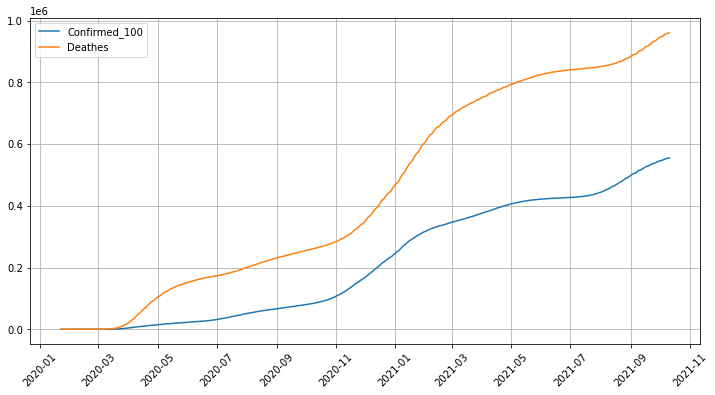

In [35]:
# 전체 누적확진자와 누적사망자 수 - 비교에 용의하도록 확진자는 100으로 나눔
draw_figure(Confirmed_100=(total_confirmed_df['Total']/100), Deathes=total_deaths_df['Total'])

In [40]:
# 일별 확진자/사망자 데이터프레임 만들기(당일에서 전일을 빼서 일별 데이터를 구함)
total_confirmed_daily = total_confirmed_df.diff()
total_deaths_daily = total_deaths_df.diff()

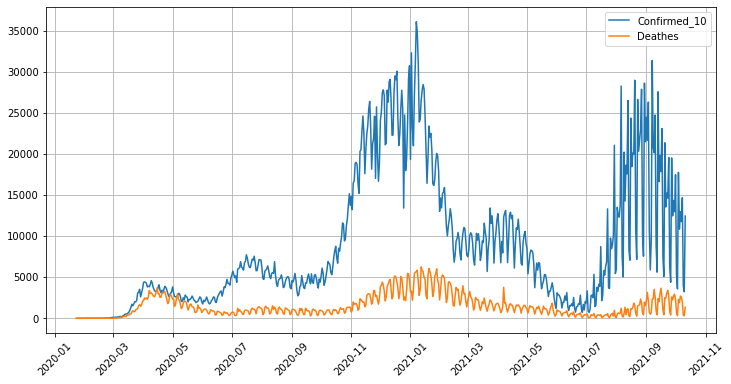

In [41]:
# 전체 일별확진자와 일별사망자 수 - 비교에 용이하도록 확진자는 10으로 나눔
draw_figure(Confirmed_10=total_confirmed_daily['Total']/10, Deathes=total_deaths_daily['Total'])

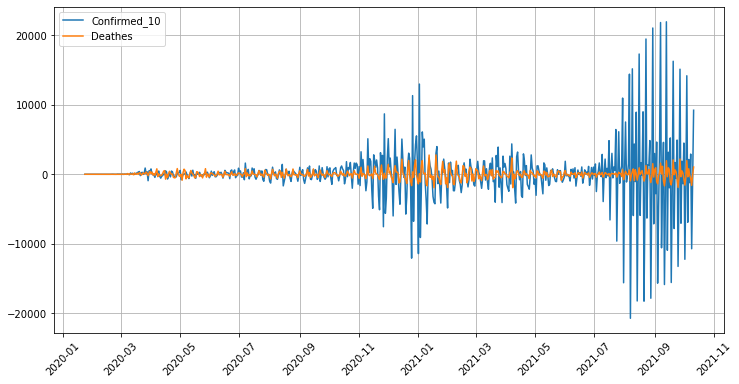

In [42]:
# 전체 일별확진자와 일별사망자 증감 - diff()를 이용, 비교에 용이하도록 확진자는 10으로 나눔
draw_figure(Confirmed_10=total_confirmed_daily['Total'].diff()/10, Deathes=total_deaths_daily['Total'].diff())

- 일별 확진자와 사망자는 시간이 흐를수록 대체적으로 증가하고 있으며,비슷한 추세를 가지고 있음.
- 일별, 증감 그래프에서 크게는 3번, 작게는 5번의 파동이 있는 것으로 보임.
- 2021년 5월부터 7월까지 확진자가 급감하였다가 다시 급증하고 있음 - 추가분석 필요.

## 3.2   5개 국가의 개별적 확진자/사망자수 시각화

In [44]:
target_country

['Korea, South', 'US', 'Japan', 'Germany', 'Italy']

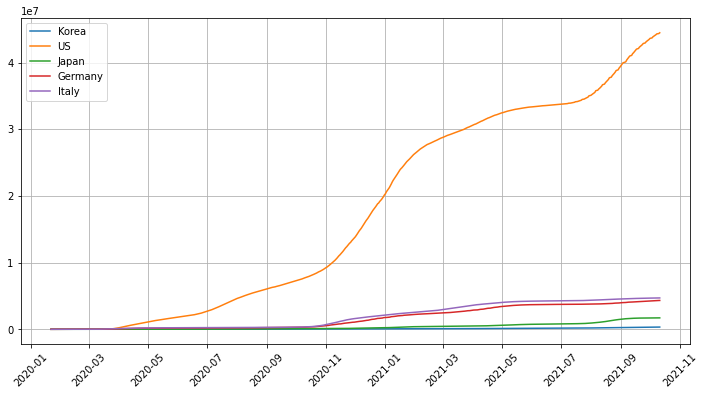

In [46]:
# 5개 국가의 누적 확진자/사망자 수
draw_figure(Korea=total_confirmed_df['Korea, South'],
            US = total_confirmed_df['US'],
            Japan = total_confirmed_df['Japan'],
            Germany = total_confirmed_df['Germany'],
            Italy = total_confirmed_df['Italy'],
           )

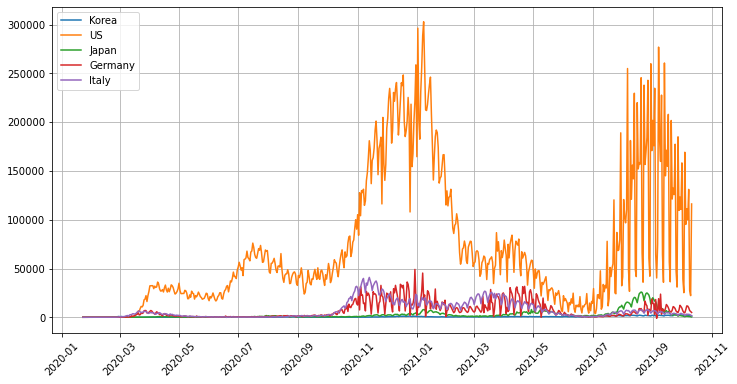

In [47]:
# 5개 국가의 일별 확진자 수
draw_figure(Korea=total_confirmed_daily['Korea, South'],
            US = total_confirmed_daily['US'],
            Japan = total_confirmed_daily['Japan'],
            Germany = total_confirmed_daily['Germany'],
            Italy = total_confirmed_daily['Italy'],
           )

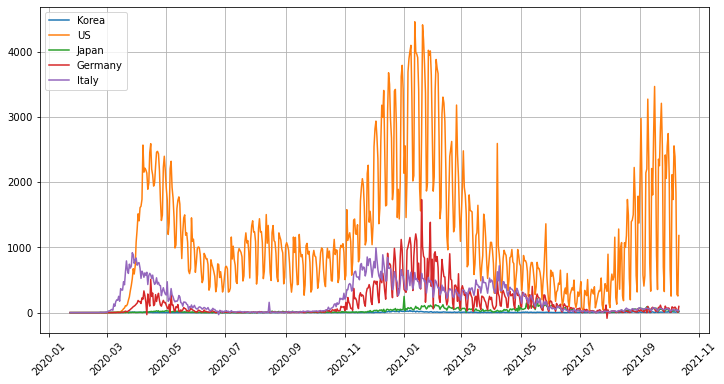

In [110]:
# 5개 국가의 일별 사망자 수
draw_figure(Korea=total_deaths_daily['Korea, South'],
            US = total_deaths_daily['US'],
            Japan = total_deaths_daily['Japan'],
            Germany = total_deaths_daily['Germany'],
            Italy = total_deaths_daily['Italy'],
           )

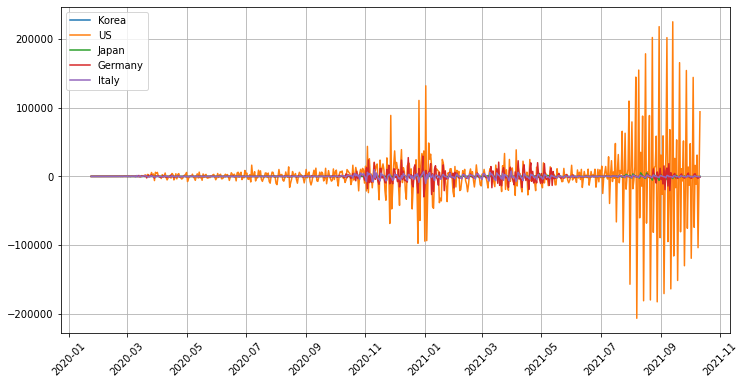

In [48]:
# 5개 국가의 일별 확진자 수 증감
draw_figure(Korea=total_confirmed_daily['Korea, South'].diff(),
            US = total_confirmed_daily['US'].diff(),
            Japan = total_confirmed_daily['Japan'].diff(),
            Germany = total_confirmed_daily['Germany'].diff(),
            Italy = total_confirmed_daily['Italy'].diff(),
           )

## 3.3 추가 시각화
- 확진자 대비 사망자 비율 그래프 그리기

In [78]:
# 2021년 10월 11일 기준 누적 확진자수
total_confirmed_df.iloc[-1]

Country/Region
Germany          4323346
Italy            4701832
Japan            1712127
Korea, South      334163
US              44455949
Total           55527417
Name: 2021-10-11 00:00:00, dtype: int64

In [80]:
# 2021년 10월 11일 기준 누적 사망자
total_deaths_df.iloc[-1]

Country/Region
Germany          94308
Italy           131335
Japan            17972
Korea, South      2594
US              714055
Total           960264
Name: 2021-10-11 00:00:00, dtype: int64

### 확진자 대비 사망자 비율 그래프 그리기

In [103]:
# 누적확진자 대비 누적사망자 비율(%)
death_confirmed_ratio = total_deaths_df/ total_confirmed_df

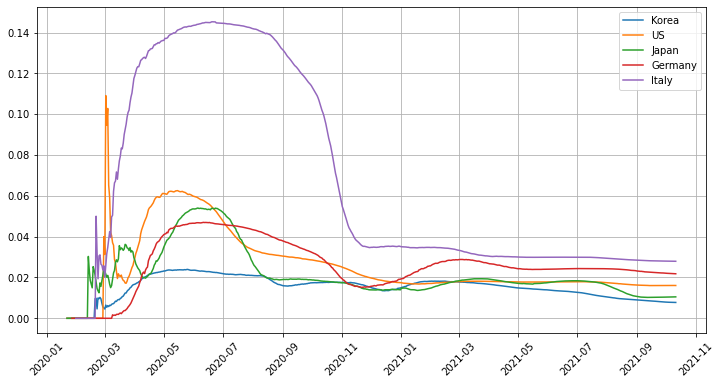

In [106]:
draw_figure(Korea=death_confirmed_ratio['Korea, South'],
            US = death_confirmed_ratio['US'],
            Japan = death_confirmed_ratio['Japan'],
            Germany = death_confirmed_ratio['Germany'],
            Italy = death_confirmed_ratio['Italy'],
           )

In [105]:
# 2021일 기준 비율
death_confirmed_ratio.iloc[-1]

Country/Region
Germany         0.021814
Italy           0.027933
Japan           0.010497
Korea, South    0.007763
US              0.016062
Total           0.017294
Name: 2021-10-11 00:00:00, dtype: float64

- 확진자 수 분석
    - 확진자 수는 미국이 압도적으로 많고, 대한민국이 가장 적음
    - 독일, 이탈리아가 비슷한 수준이며 일본은 상대적으로 적은 수준


- 사망자 수 분석
    - 사망자 수도 미국이 1위이나, 확진자에 비해 압도적으로 많지는 않음. 대한민국이 가장 적음.
    - 사망자 수의 순위는 확진자 수의 순위와 동일(미국->이탈리아->독일->일본->대한민국 순)
    
    
- 확진자 대비 사망자 비율 분석
    - 비율의 순위는(이탈리아->독일->미국->일본->대한민국 순)
    - 비율의 순위가 의료체계 순위와 같다고 할 순 없지만 참고자료가 될 수 있음. (확진자 수가 적어 환자 수용능력을 초과하지 않았을 수 있음을 주의)
    - 다만 미국은 확진자 및 사망자 수는 1위이지만 확진자 대비 사망자 비율은 낮은걸로 보아 의료체계가 잘 갖춰진 것임을 어느정도 가늠할 수 있음
    - 반면 이탈리아의 확진자 대비 사망자 비율이 20년 2,3분기에 급증하여 확진자가 폭증할 때 의료체계가 붕괴된 것으로 추측해 볼 수 있음

# 문제4 - 인구수별 비율로 확진자/사망자 표현
- 통계청 싸이트에서 인구수 가져옴
- https://kosis.kr/vis_kor/nso/worldInKor/selectWorldInKor.do
- 일자별 인구수를 구할 수는 없어 각 나라별 2020년 인구수를 고정값으로 사용
- 데이터가 적기 때문에 별도의 크롤링 없이 값을 가져옴. 나라별 인구수는 아래와 같음
    - 대한민국:  51,780,579명
    - 미국   : 329,484,123명
    - 일본   : 125,836,021명
    - 독일   :  83,240,525명
    - 이탈리아:  59,554,023명

## 4.1 인구수별 비율 구하기

In [95]:
# 딕셔너리에 인구수 저장하기
population = {'Korea, South':51780579, 'US':329484123, 'Japan':125836021, 'Germany':83240525, 'Italy':59554023}
population = pd.Series(population)
population['Total'] = population.sum()
population

Korea, South     51780579
US              329484123
Japan           125836021
Germany          83240525
Italy            59554023
Total           649895271
dtype: int64

In [371]:
# 나라별 확진자/사망자 수를 인구수로 나눠서 인구수별 비율(%) 데이터프레임 만들기
confirmed_ratio_daily = total_confirmed_daily / population * 100
confirmed_ratio_total = total_confirmed_df / population * 100
deaths_ratio_daily = total_deaths_daily / population * 100
deaths_ratio_total = total_deaths_df / population * 100

## 4.2 3번과 동일하게 그래프 그려보기

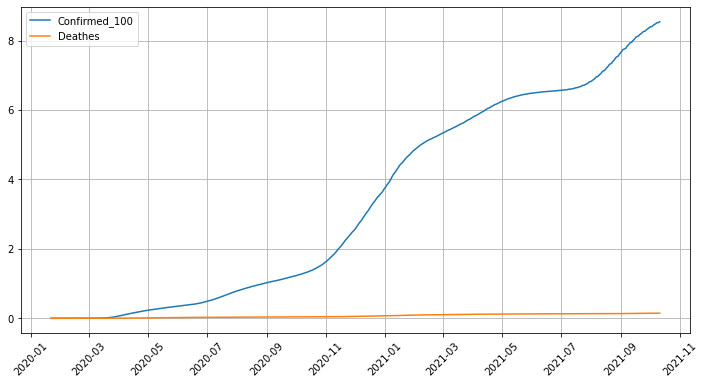

In [101]:
# 인구대비 누적확진자와 누적사망자 비율
draw_figure(Confirmed_100=(confirmed_ratio_total['Total']), Deathes=deaths_ratio_total['Total'])

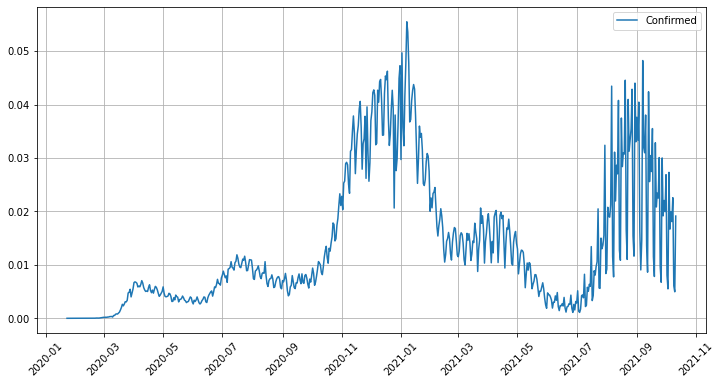

In [107]:
# 전체 일별확진자 수 비율
draw_figure(Confirmed=confirmed_ratio_daily['Total'])

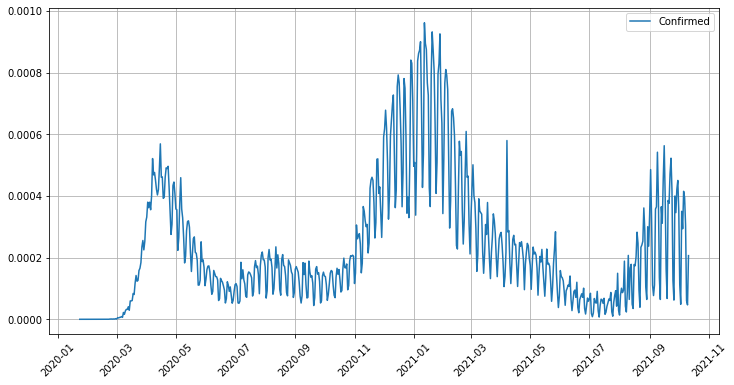

In [109]:
# 전체 일별사망자 수 비율
draw_figure(Confirmed=deaths_ratio_daily['Total'])

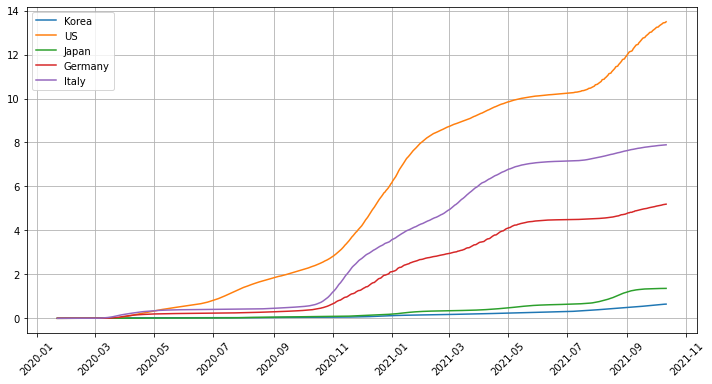

In [112]:
# 국가별 누적확진자 비율
draw_figure(Korea=confirmed_ratio_total['Korea, South'],
            US = confirmed_ratio_total['US'],
            Japan = confirmed_ratio_total['Japan'],
            Germany = confirmed_ratio_total['Germany'],
            Italy = confirmed_ratio_total['Italy'],
           )

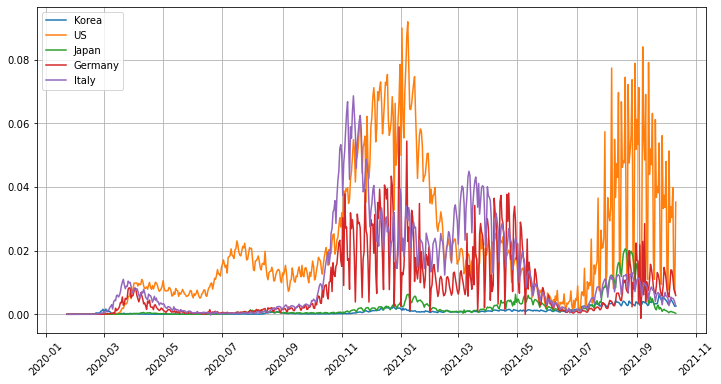

In [113]:
# 국가별 일별확진자 비율
draw_figure(Korea=confirmed_ratio_daily['Korea, South'],
            US = confirmed_ratio_daily['US'],
            Japan = confirmed_ratio_daily['Japan'],
            Germany = confirmed_ratio_daily['Germany'],
            Italy = confirmed_ratio_daily['Italy'],
           )

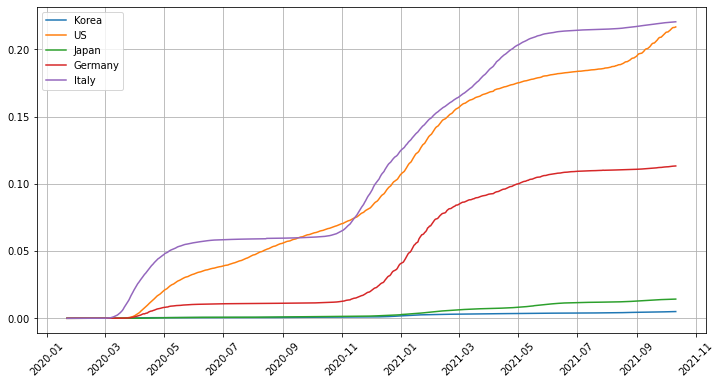

In [121]:
# 국가별 누적사망자 비율
draw_figure(Korea=deaths_ratio_total['Korea, South'],
            US = deaths_ratio_total['US'],
            Japan = deaths_ratio_total['Japan'],
            Germany = deaths_ratio_total['Germany'],
            Italy = deaths_ratio_total['Italy'],
           )

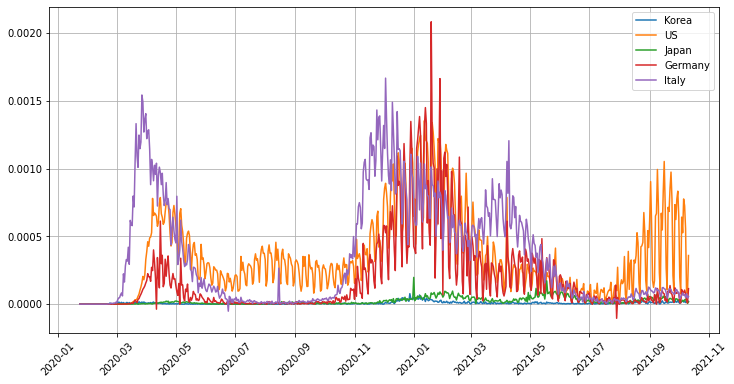

In [115]:
# 국가별 일별사망자 비율
draw_figure(Korea=deaths_ratio_daily['Korea, South'],
            US = deaths_ratio_daily['US'],
            Japan = deaths_ratio_daily['Japan'],
            Germany = deaths_ratio_daily['Germany'],
            Italy = deaths_ratio_daily['Italy'],
           )

- 인구대비 확진자비율 분석
    - 확진자비율 순위는 확진자 수와 동일(미국->이탈리아->독일->일본->대한민국)
    - 다만, 미국이 확진자 수가 압도적으로 많았던 반면 비율로는 갭이 다른나라와 상대적으로 작음.(그럼에도 불구하고 13% 이상이 확진됨)
    - 이탈리아가 비율로는 미국을 앞지른 구간이 있음.
    - 확진자 수로 봤을 땐 한국이 모든 구간에서 가장 적었지만, 비율로 봤을 땐 최근엔 일본이 대한민국보다 확진자 비율이 낮음
    

- 사망자 수 분석
    - 비율로는 이탈리아가 미국을 제치고 1위(이탈리아->미국->독일->일본->대한민국 순)

# 문제 5 - 시계열 분석
- 확진자 및 사망자 변동을 보는게 적합한 것으로 판단 - 누적이 아닌 일별데이터를 사용
- 전체데이터로 수행
- 각 나라별로 수행

In [123]:
from fbprophet import Prophet

In [ ]:
# fbProphet으로 그래프 그리는 함수만들기
def show_fb_prophet(daily_df):
    df = pd.DataFrame({'ds':daily_df.index, 'y':daily_df.values})
    m = Prophet(yearly_seasonality=True, daily_seasonality=True)
    m.fit(df)
    future = m.make_future_dataframe(periods=10)
    forecast = m.predict(future)
    m.plot(forecast)
    m.plot_components(forecast)

## 5.1 전체 데이터로 추세 관찰

Initial log joint probability = -16.6509
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1161.97    0.00564698       135.103           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1166.17   1.75018e-07       74.5829           1           1      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     202       1166.17   1.13977e-08       76.1002     0.06685           1      249   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


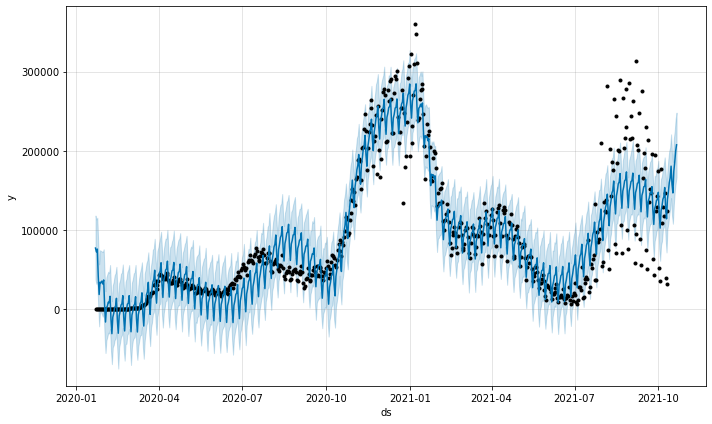

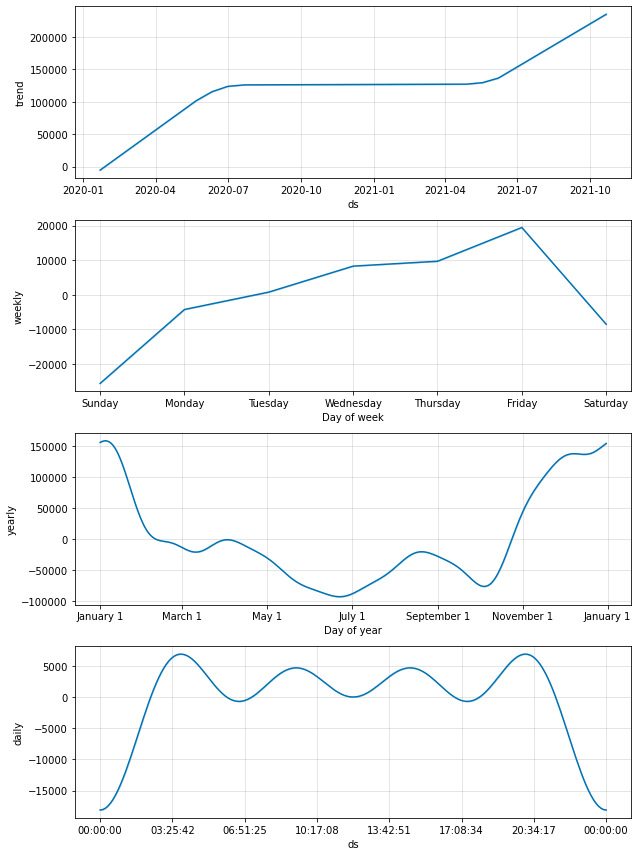

In [124]:
# 일별 확진자
show_fb_prophet(total_confirmed_daily['Total'])

Initial log joint probability = -22.1434
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1084.25    0.00174551       111.552      0.9073      0.9073      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     125       1095.68   0.000948458       217.285   2.399e-06       0.001      189  LS failed, Hessian reset 
     199       1129.21     0.0059751       120.108       0.409           1      280   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1142.49     0.0171306       244.899      0.2371           1      405   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     307       1144.95   0.000550407       181.508   2.097e-06       0.001      454  LS failed, Hessian reset 
     387       1149.01    0.00071494       92.6221   8.546e-06       0.001      584  LS failed, Hessian rese

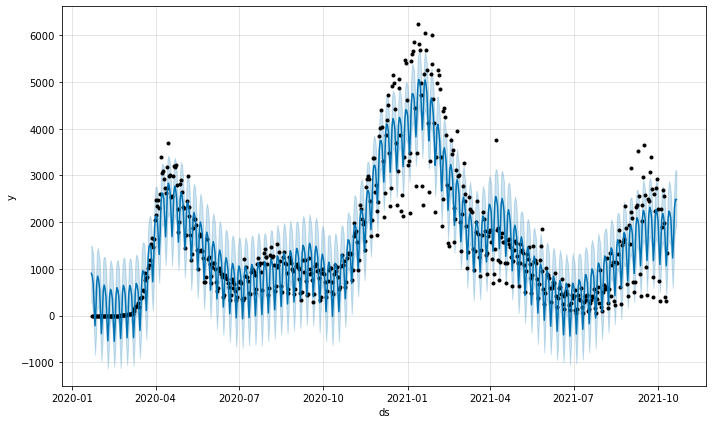

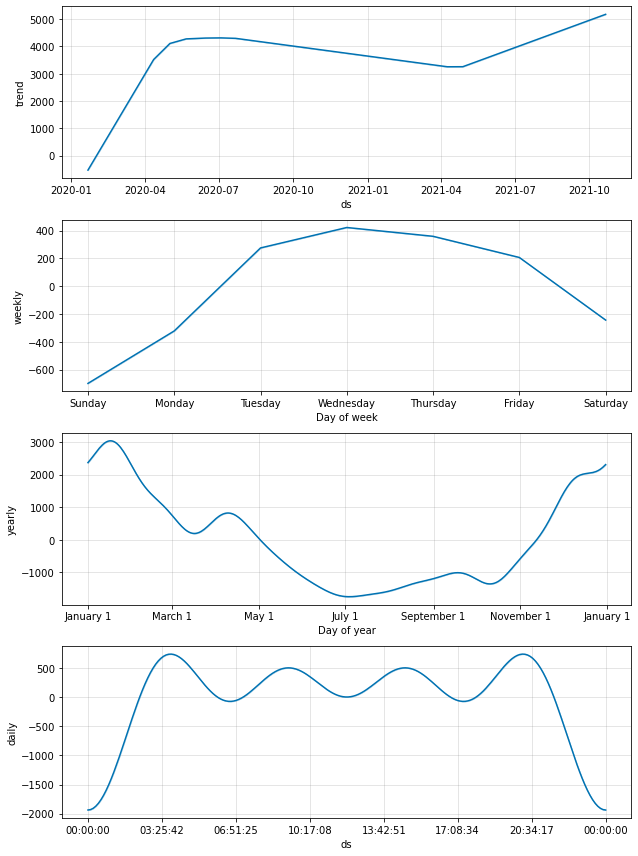

In [126]:
# 일별 사망자
show_fb_prophet(total_deaths_daily['Total'])

## 5.2 각 나라별 데이터로 추세 관찰

### 대한민국

Initial log joint probability = -6.89218
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1545.32     0.0147997       114.055           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     182       1551.61   0.000148063       139.551   1.108e-06       0.001      267  LS failed, Hessian reset 
     199       1552.67    0.00021278       101.779      0.2817      0.2817      291   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1554.43   0.000514838       110.286           1           1      416   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     322       1554.85   0.000154616       140.038   1.376e-06       0.001      486  LS failed, Hessian reset 
     399       1555.05   0.000397991       71.2288           1           1      589   
    Iter      log pro

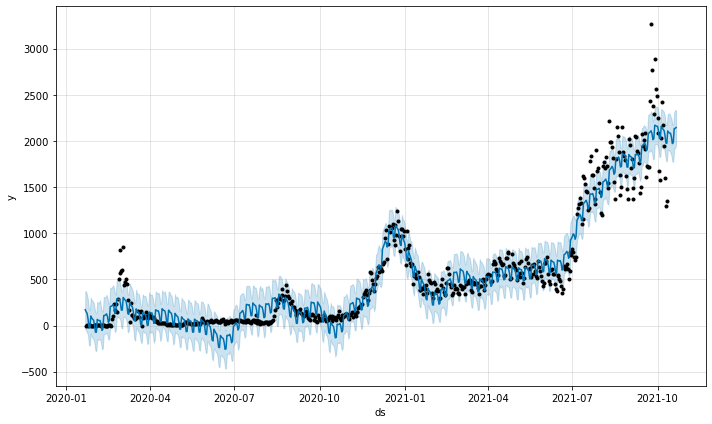

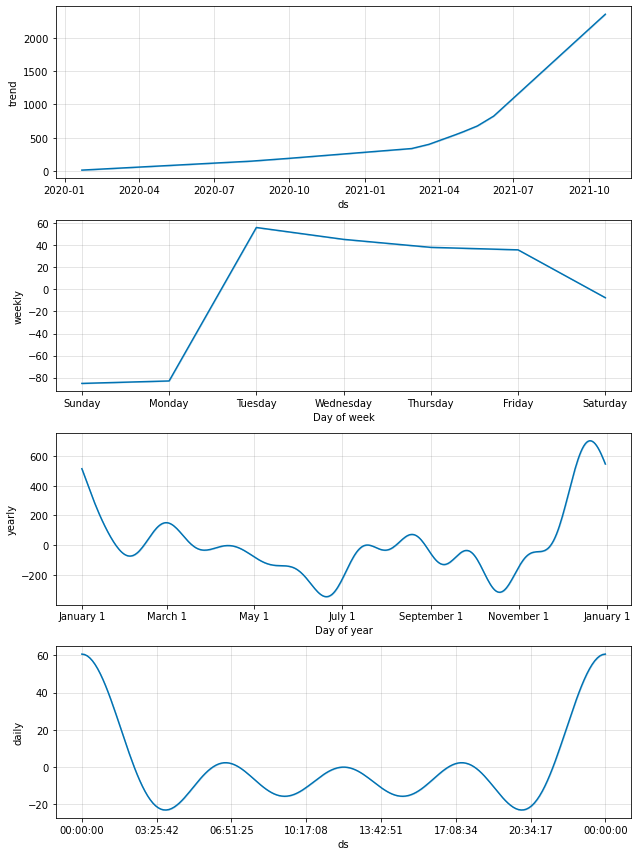

In [127]:
# 일별 확진자
show_fb_prophet(total_confirmed_daily['Korea, South'])

Initial log joint probability = -7.53264
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1395.43    0.00842436       73.9828      0.9659      0.9659      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     158       1397.24   0.000666081       158.412   7.187e-06       0.001      242  LS failed, Hessian reset 
     199       1397.65   1.67938e-05       64.1179      0.6515      0.6515      291   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     269       1398.19    0.00165436       65.5023    2.51e-05       0.001      458  LS failed, Hessian reset 
     299       1398.83   0.000170101       63.4294      0.0792           1      500   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     369       1398.89   8.19503e-05       73.3562   1.243e-06       0.001      643  LS failed, Hessian rese

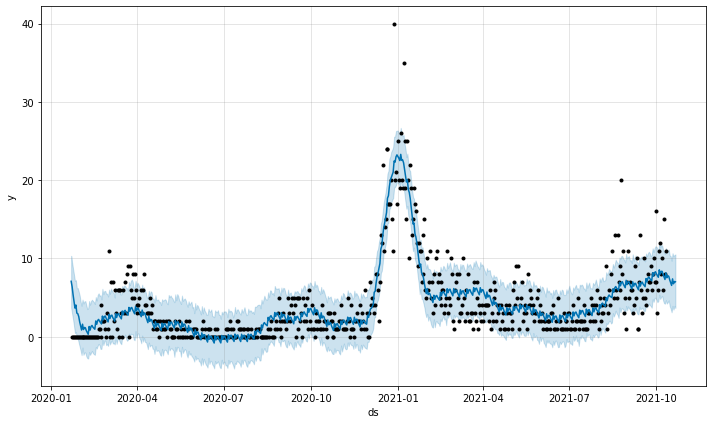

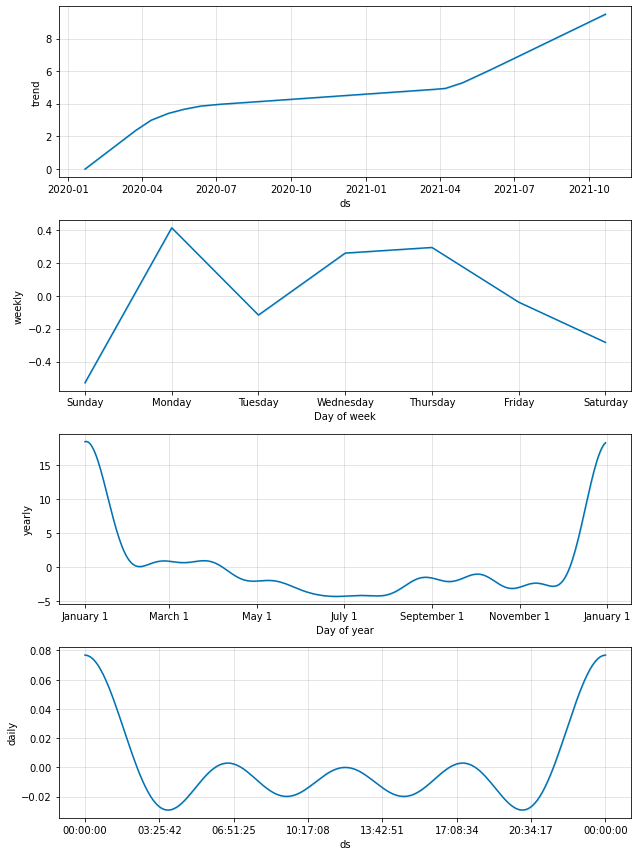

In [128]:
# 일별 사망자
show_fb_prophet(total_deaths_daily['Korea, South'])

### 미국

Initial log joint probability = -16.137
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1105.25    0.00632371       130.359           1           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1109.51   0.000441277        83.577           1           1      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1110.42    0.00912794       79.1507           1           1      356   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     329       1111.08    0.00272768       269.608   2.252e-05       0.001      435  LS failed, Hessian reset 
     366       1111.32   9.92129e-05       67.6252   1.092e-06       0.001      519  LS failed, Hessian reset 
     399       1111.33   7.07604e-08       76.2161      0.5685      0.5685      562   
    Iter      log prob

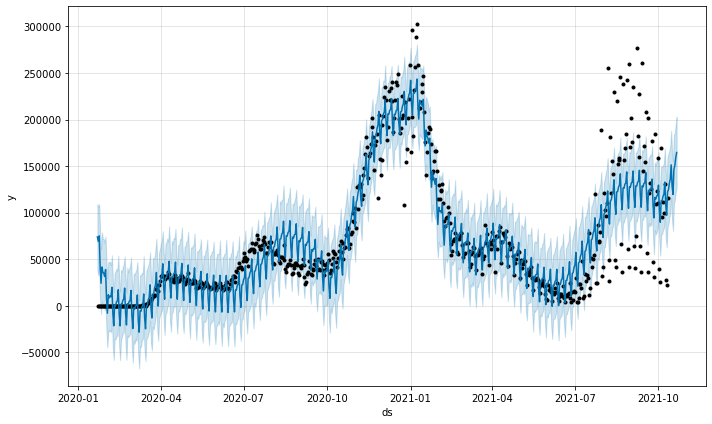

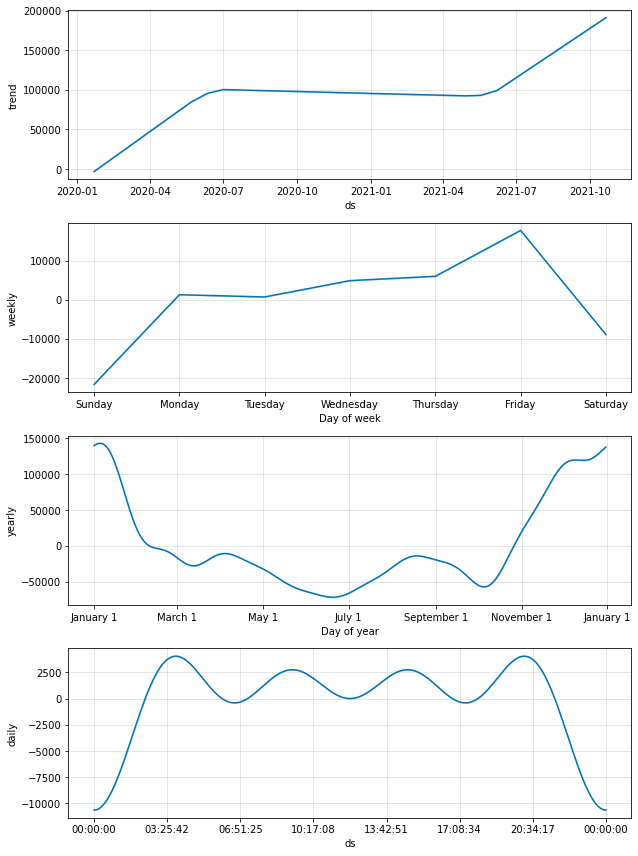

In [129]:
# 일별 확진자
show_fb_prophet(total_confirmed_daily['US'])

Initial log joint probability = -21.8938
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       978.676     0.0169641       163.524           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1008.71     0.0128077        125.35      0.7989      0.7989      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1022.97    0.00642864       73.8926      0.2501           1      363   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     398       1037.73    0.00240932       250.768   2.747e-05       0.001      533  LS failed, Hessian reset 
     399        1037.8    0.00108764       99.6611           1           1      534   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     439       1039.71    0.00112014    

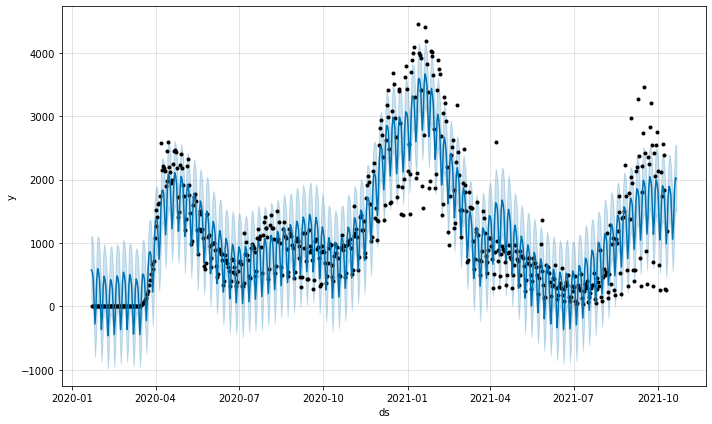

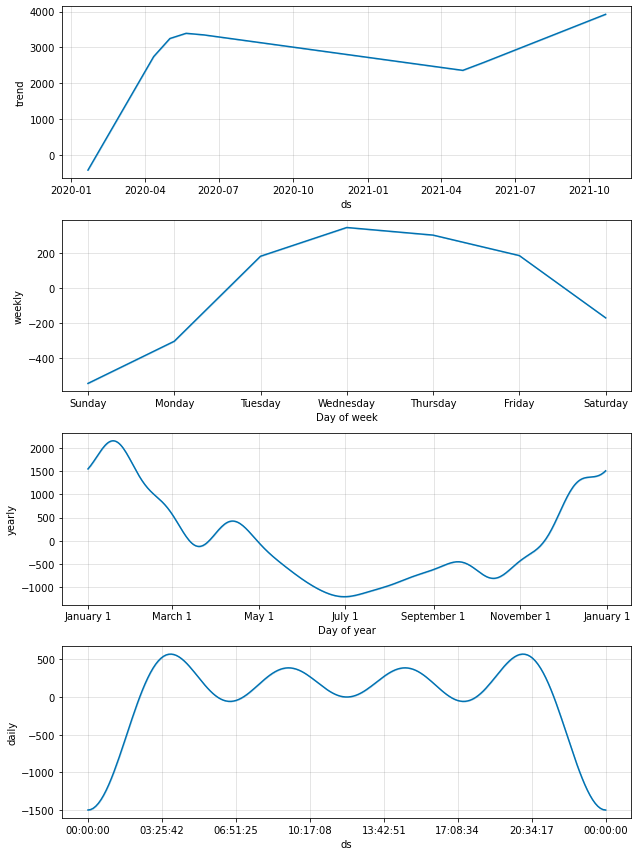

In [130]:
# 일별 사망자
show_fb_prophet(total_deaths_daily['US'])

### 일본

Initial log joint probability = -13.979
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1179.98     0.0183809       91.3001           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1183.13   2.43576e-05       78.2201           1           1      255   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     212       1183.14   3.67822e-05        93.509   3.795e-07       0.001      309  LS failed, Hessian reset 
     247       1183.14   3.81773e-08        77.254      0.4789      0.4789      358   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


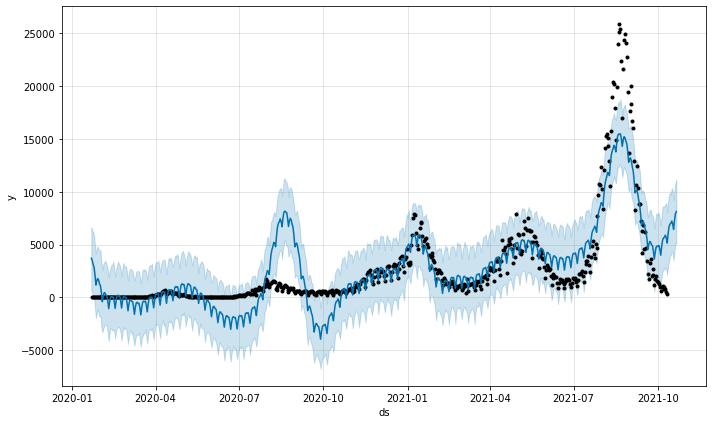

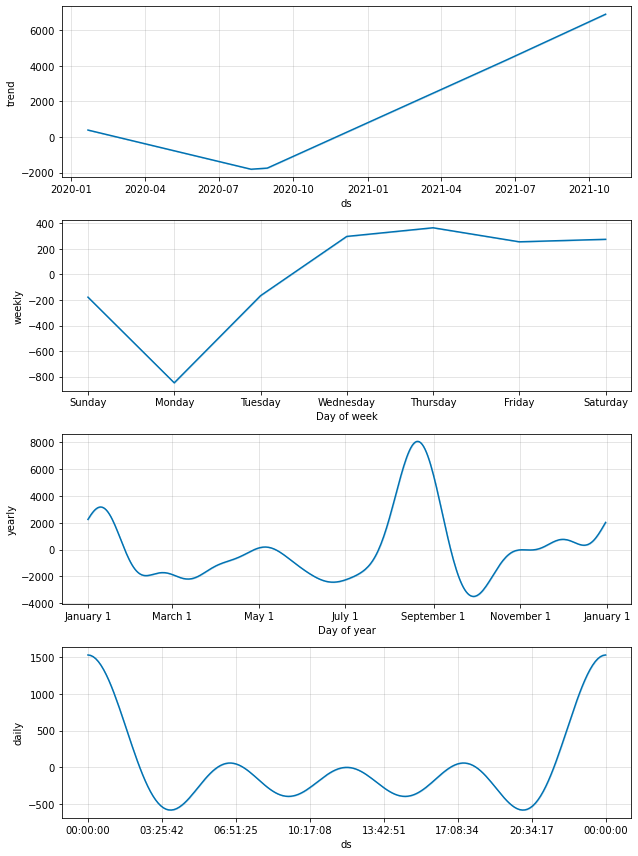

In [131]:
# 일별 확진자
show_fb_prophet(total_confirmed_daily['Japan'])

Initial log joint probability = -8.18798
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1358.81     0.0094018       231.159       2.715      0.2715      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     177        1359.9   5.87867e-05       48.5472   8.053e-07       0.001      273  LS failed, Hessian reset 
     199       1360.07    0.00119946       79.9317           1           1      299   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     283       1360.87   0.000347474       167.109   1.671e-06       0.001      449  LS failed, Hessian reset 
     299       1361.08   1.47844e-05       56.9129      0.3498           1      469   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     317       1361.08   3.93621e-06       61.7109   6.016e-08       0.001      537  LS failed, Hessian rese

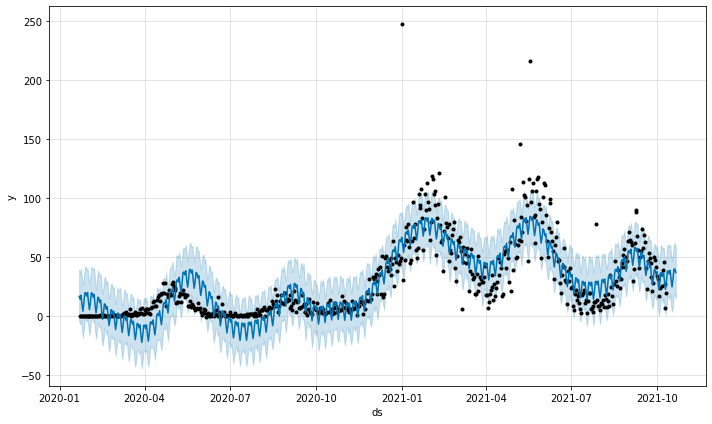

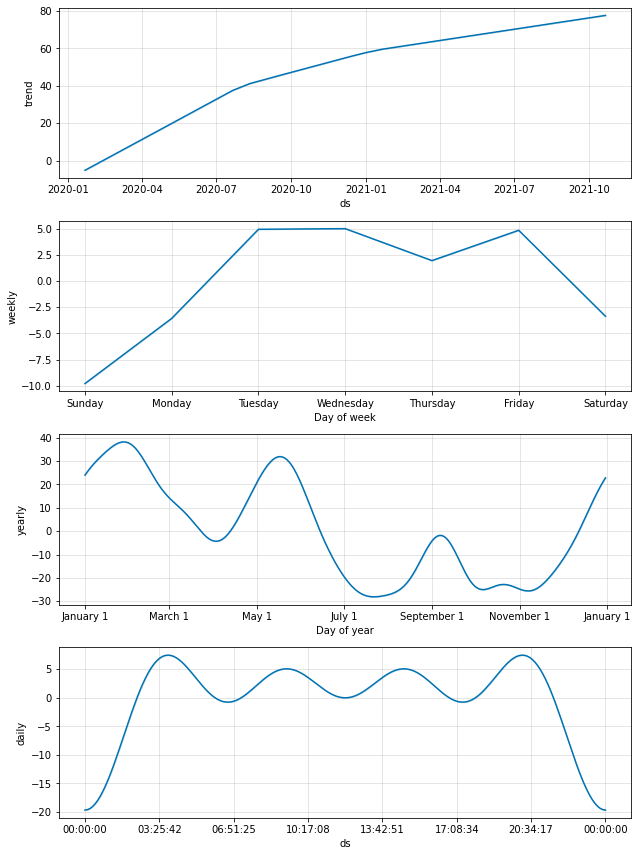

In [132]:
# 일별 사망자
show_fb_prophet(total_deaths_daily['Japan'])

### 독일

Initial log joint probability = -13.1291
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1166.52   0.000188865       57.3509           1           1      134   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1168.52   4.81036e-05       64.7864      0.2899        0.67      263   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     210       1168.55    0.00015689       89.7444   1.942e-06       0.001      315  LS failed, Hessian reset 
     299       1168.58   9.62113e-07       79.9001      0.4523      0.4523      439   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     305       1168.58   4.64944e-06       67.9741   4.941e-08       0.001      487  LS failed, Hessian reset 
     399       1168.59   9.73764e-07       54.2554      0.2261           1      606   
    Iter      log pro

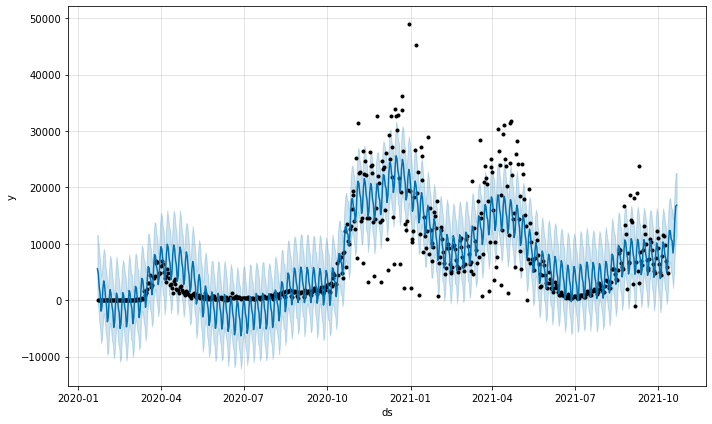

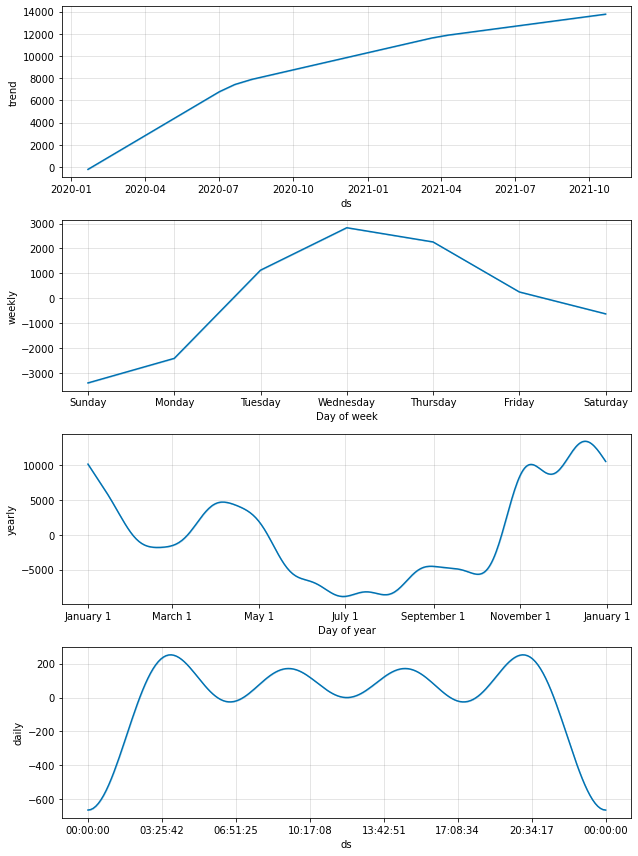

In [133]:
# 일별 확진자
show_fb_prophet(total_confirmed_daily['Germany'])

Initial log joint probability = -8.18798
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1358.81     0.0094018       231.159       2.715      0.2715      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     177        1359.9   5.87867e-05       48.5472   8.053e-07       0.001      273  LS failed, Hessian reset 
     199       1360.07    0.00119946       79.9317           1           1      299   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     283       1360.87   0.000347474       167.109   1.671e-06       0.001      449  LS failed, Hessian reset 
     299       1361.08   1.47844e-05       56.9129      0.3498           1      469   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     317       1361.08   3.93621e-06       61.7109   6.016e-08       0.001      537  LS failed, Hessian rese

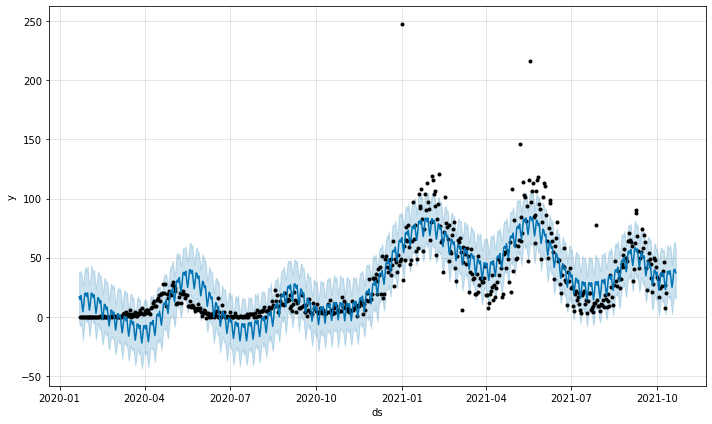

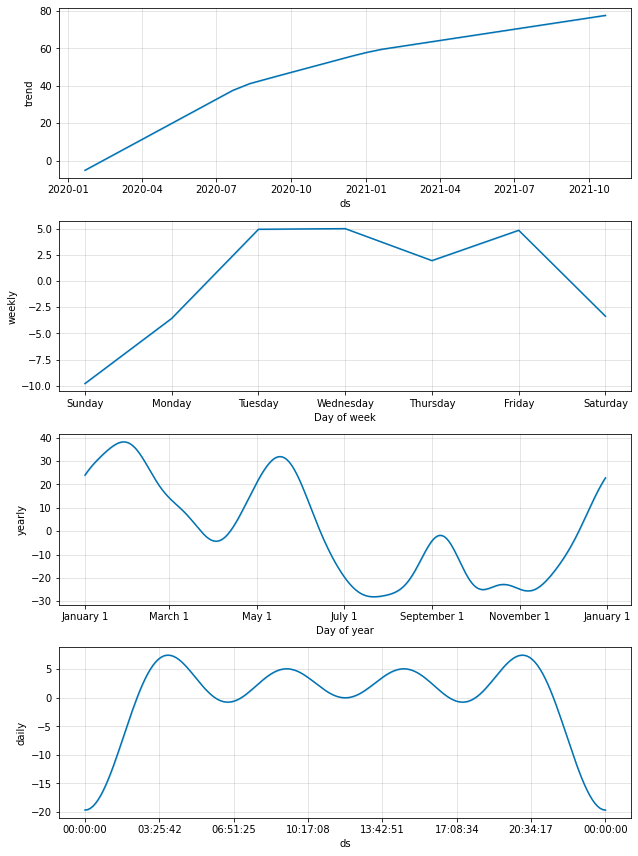

In [134]:
# 일별 사망자
show_fb_prophet(total_deaths_daily['Japan'])

### 이탈리아

Initial log joint probability = -24.4708
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1513.36    0.00211925       146.393           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1526.04    0.00134971       144.945           1           1      249   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     257       1528.56   0.000975418       120.563   1.093e-05       0.001      349  LS failed, Hessian reset 
     299       1528.99    0.00258354       125.835           1           1      399   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1530.89   6.03968e-07       77.7033      0.2712           1      529   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     418       1530.89   4.62011e-08    

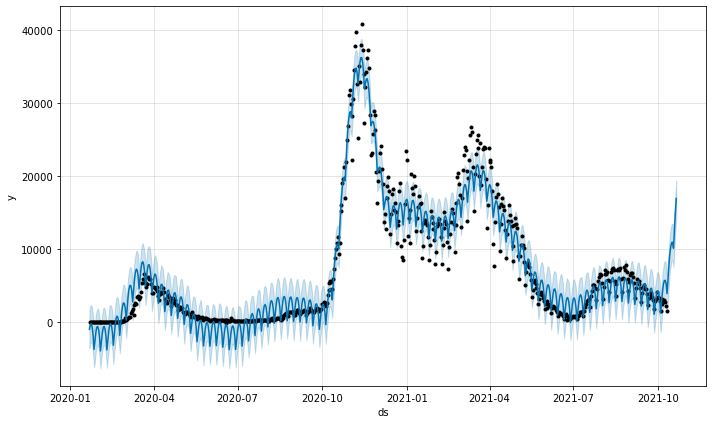

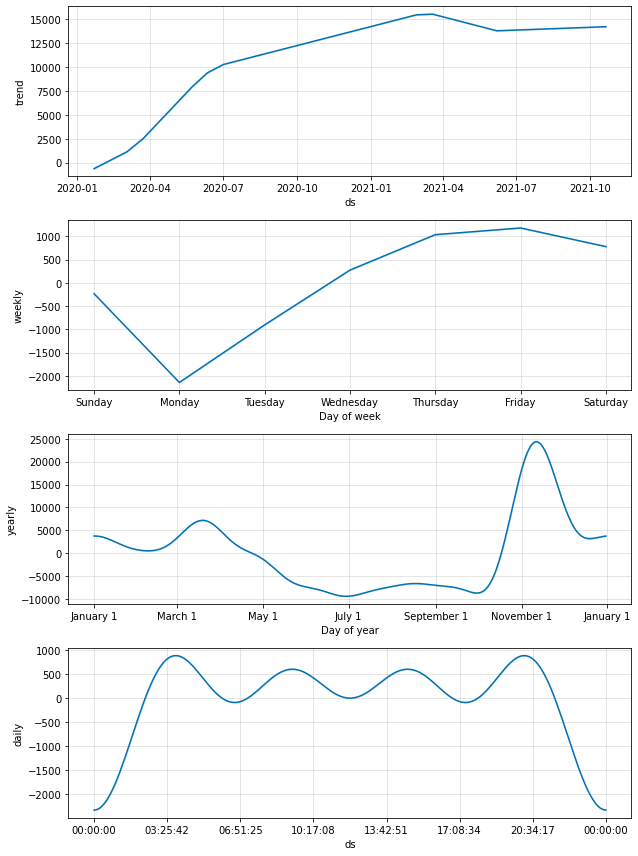

In [135]:
# 일별 확진자
show_fb_prophet(total_confirmed_daily['Italy'])

Initial log joint probability = -31.0695
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1250.01       0.05202       287.556      0.9793      0.9793      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1285.57     0.0163026       370.618           1           1      248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1298.98    0.00082269       75.0823           1           1      380   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1304.21     0.0037896       129.381      0.4542           1      504   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1308.17   0.000917272        115.51      0.8364      0.8364      622   
    Iter      log prob        ||dx||      ||grad||       alpha  

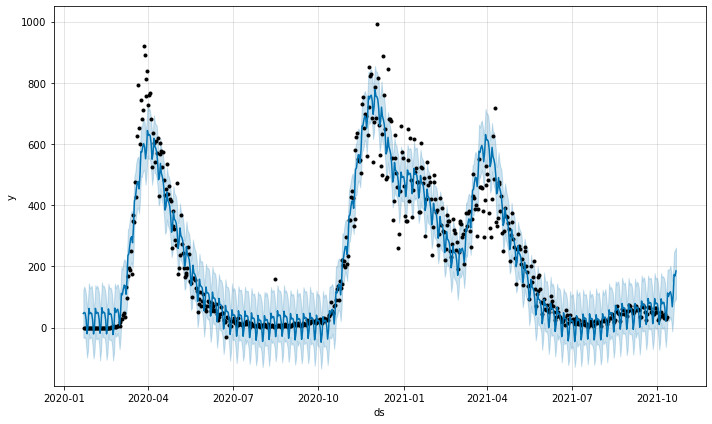

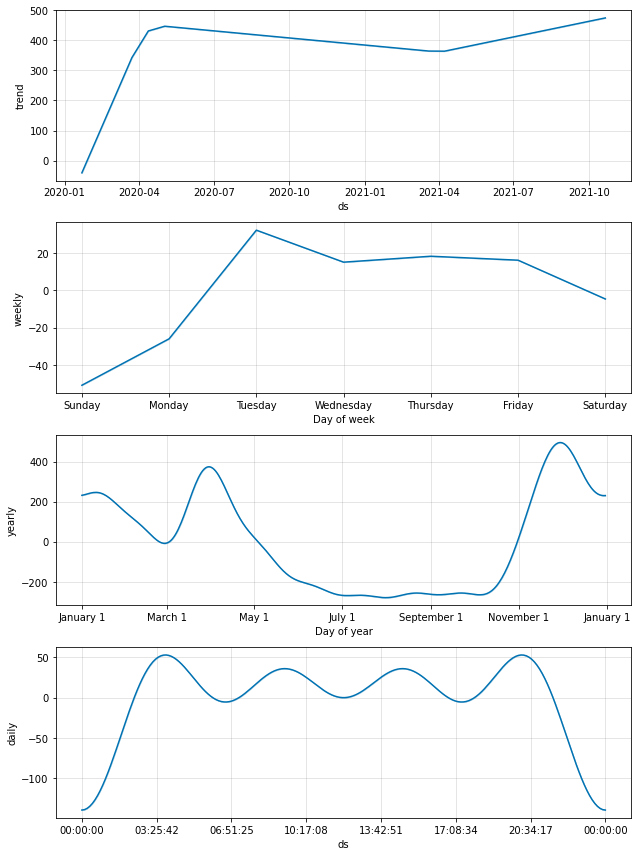

In [136]:
# 일별 사망자
show_fb_prophet(total_deaths_daily['Italy'])

- 한국의 trend가 증가하는 추세, 특히 최근에 크게 증가하고 있음: 지금까지는 방역체계를 갖춰왔지만 곧 통제하기 힘든 상태로 갈 수도 있음
- 반면 다른나라는 점진적으로 증가
- 부가적으로 확진자 발생은 요일별 차이가 있음(ex. 확진자가 가장 적은요일: 일요일(대한민국, 미국, 독일)/ 월요일(일본, 이탈리아)
    - 나라별로 확진자 발표 시기의 차이가 다를 수 있음(특히 대한민국은 일,월요일이 상대적으로 적음)
    - 요일별 활동 정도에 따른 차이일 수도 있음
- 관측기간이 2년이 안되지만, 대체로 여름보단 겨울에 확진자가 많음(일본 제외 - 도쿄올림픽(21년 7~8월)의 영향으로 인한 것으로 보임)

# 문제6 - 우리나라는 다른 국가 대비 어떠한가?
- 문제1~5의 데이터로 일차적 분석
- 추가 데이터 고려
    - 개인주의 성향 고려
- Our World in Data에서 추가 정보 수집
    - https://covid.ourworldindata.org/data/owid-covid-data.csv
- 종합 의견

## 6.1 기존 결과로 분석
- 앞서 분석한 내용의 정리

- 대한민국의 확진자 수 / 인구대비 확진자 수 / 사망자 수 / 확진자 대비 확진자 수가 5국가 중 가장 작다.
- 다만 트렌드 상 최근 확진자 수가 증가 추세이다.
    - 특히 인구대비 확진자 비율은 일본에 추월당함.
- 확진자 대비 사망자 비율 역시 가장 작아 현재 의료체계가 확진자를 수용할 수 있는 범위에 있는 것으로 판단된다.
    - 시계열 분석상 증가하는 것처럼 보이나 절대적인 값이 작다.
    - 비율이 낮을 수록 확진되었더라도 사망으로 이어지지 않는 지표 
    
    
### -> 지금까지의 결과로는 대한민국은 코로나에 가장 잘 대응하고 있는 것으로 보임 

## 6.2 추가 데이터 고려

### 6.2.1 개인주의 성향 고려
- 코로나 확진자 순위가 1위는 북아메리카, 2,3위는 유럽, 4,5위는 아시아로 구분됨
- 일반적으로 대륙별로 개인주의 성향이 다른 것으로 알려져 있음.
- 방역 성과가 국가 시스템이 아닌 개인주의 성향에 따른 결과일 수도 있지 않을까?
- 개인주의를 수치화 하는 방법은 논외로 하고 개인주의 성향 점수 자료를 인터넷에서 검색함
    - Country scores for individualism index.
        - https://www.researchgate.net/figure/Country-scores-for-individualism-index_tbl1_334509709
    - 이미지로 되어있어 부득이 일일이 옮기는 작업이 필요함
- 5개 국가가 아니라 대륙별로 국가를 추가(선진국 위주), 현재까지의 누적 확진자와 개인주의 성향과의 상관관계를 구해봄
- 5개 국가의 개인주의지수: 대한민국-18, 미국-91, 일본-46, 독일-67, 이탈리아-76
- 추가 국가
    - 북아메리카: 캐나다-80, 멕시코-30
    - 유럽: 영국-91, 프랑스-71, 러시아-39, 그리스-35, 스위스-68, 스웨덴-71, 스페인-51
    - 아시아: 싱가폴-20, 필리핀-32

In [157]:
# 확진자 데이터에서 국가 이름을 찾기 위해 한번 프린트 함
for i in confirmed_df.index:
    print(i, end='/ ')

Afghanistan/ Albania/ Algeria/ Andorra/ Angola/ Antigua and Barbuda/ Argentina/ Armenia/ Australia/ Australia/ Australia/ Australia/ Australia/ Australia/ Australia/ Australia/ Austria/ Azerbaijan/ Bahamas/ Bahrain/ Bangladesh/ Barbados/ Belarus/ Belgium/ Belize/ Benin/ Bhutan/ Bolivia/ Bosnia and Herzegovina/ Botswana/ Brazil/ Brunei/ Bulgaria/ Burkina Faso/ Burma/ Burundi/ Cabo Verde/ Cambodia/ Cameroon/ Canada/ Canada/ Canada/ Canada/ Canada/ Canada/ Canada/ Canada/ Canada/ Canada/ Canada/ Canada/ Canada/ Canada/ Canada/ Canada/ Central African Republic/ Chad/ Chile/ China/ China/ China/ China/ China/ China/ China/ China/ China/ China/ China/ China/ China/ China/ China/ China/ China/ China/ China/ China/ China/ China/ China/ China/ China/ China/ China/ China/ China/ China/ China/ China/ China/ China/ Colombia/ Comoros/ Congo (Brazzaville)/ Congo (Kinshasa)/ Costa Rica/ Cote d'Ivoire/ Croatia/ Cuba/ Cyprus/ Czechia/ Denmark/ Denmark/ Denmark/ Diamond Princess/ Djibouti/ Dominica/ Dom

In [158]:
# 기존 5개 국가
target_country

['Korea, South', 'US', 'Japan', 'Germany', 'Italy']

In [171]:
# 추가 국가
add_country = ['Canada', 'Mexico', 
               'United Kingdom', 'France', 'Russia','Greece', 'Switzerland', 'Sweden', 'Spain',
               'Singapore', 'Philippines']

# 개인주의 성향지수를 Series에 담아줌
individualism_idx = { 
    'Korea, South': 18, 'US':91, 'Japan':46, 'Germany':67, 'Italy':76,
    'Canada':80, 'Mexico':30, 
    'United Kingdom':91, 'France':71, 'Russia':39,'Greece':35, 'Switzerland':68, 'Sweden':71, 'Spain':51,
    'Singapore':20, 'Philippines':30                
    }
individualism_idx = pd.Series(individualism_idx, name='idx')
individualism_idx

Korea, South      18
US                91
Japan             46
Germany           67
Italy             76
Canada            80
Mexico            30
United Kingdom    91
France            71
Russia            39
Greece            35
Switzerland       68
Sweden            71
Spain             51
Singapore         20
Philippines       30
Name: idx, dtype: int64

In [199]:
# 대상 국가의 확진자 수를 구함

total_country = target_country + add_country
confirmed_dic = {}
for country in total_country:
    confirmed_dic[country] = confirmed_df.loc[[country],'10/11/21'].sum() # 주 별로 표기된 값이 있어 sum으로 합쳐줌
confirmed_dic
confirmed_dic = pd.Series(confirmed_dic, name = 'confirmed')
confirmed_dic

Korea, South        334163
US                44455949
Japan              1712127
Germany            4323346
Italy              4701832
Canada             1668009
Mexico             3725242
United Kingdom     8232327
France             7157206
Russia             7687559
Greece              679157
Switzerland         850684
Sweden             1157822
Spain              4977448
Singapore           129229
Philippines        2674814
Name: confirmed, dtype: int64

In [202]:
# 누적확진자 수, 개인주의 지수를 하나의 데이터프레임으로 만듦
individualism_df = pd.DataFrame([confirmed_dic, individualism_idx]).T
individualism_df

confirmed  idx
Korea, South       334163   18
US               44455949   91
Japan             1712127   46
Germany           4323346   67
Italy             4701832   76
Canada            1668009   80
Mexico            3725242   30
United Kingdom    8232327   91
France            7157206   71
Russia            7687559   39
Greece             679157   35
Switzerland        850684   68
Sweden            1157822   71
Spain             4977448   51
Singapore          129229   20
Philippines       2674814   30

In [203]:
# 상관관계 구하기
individualism_df.corr()

confirmed       idx
confirmed   1.000000  0.474813
idx         0.474813  1.000000

In [220]:
# 그래프 그리기
import seaborn as sns

In [218]:
x = np.linspace(0, 100, 1000)

<Figure size 2160x720 with 0 Axes>

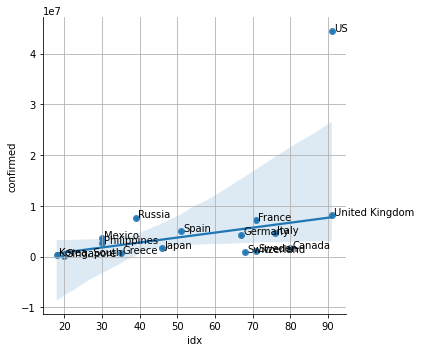

In [245]:
plt.figure(figsize = (30,10))
sns.lmplot(x='idx', y='confirmed', data=individualism_df, order= 1, robust=True) # 미국 값이 너무 커서 robust 옵션 설정

plt.scatter(individualism_df['idx'], individualism_df['confirmed'], s=10)

for country in total_country:
    plt.text(individualism_df.loc[country].idx+0.5, individualism_df.loc[country].confirmed, country)

plt.grid(True)
plt.show();

- 개인주의 성향과 확진자수에는 어느정도 상관관계가 있음(상관관계=0.475)
- 미국은 outlier로 보고 lmplot의 robust 옵션을 True 로 주었음
- 대한민국의 개인주의 성향 지수가 워낙 낮아 1차 그래프 상으론 확진자 수가 거의 발생하지 않아야 함
    - 이 결과를 그대로 받아들이기에는 무리가 있음
    - 그러나 다른 영향을 무시했을 땐 대한민국의 개인주의 성향 지수가 낮은 것이 코로나 확산을 줄이는 영향이 있는 것으로 보임

## 6.3 Our World in Data에서 추가 정보 수집
- 백신접종인원, 코로나검사 수 등의 정보를 csv파일로 제공
- https://covid.ourworldindata.org/data/owid-covid-data.csv

In [248]:
our_world_df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
our_world_df # 가공이 필요함..

iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1           AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2           AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3           AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4           AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   
...         ...       ...          ...         ...          ...        ...   
123227      ZWE    Africa     Zimbabwe  2021-10-08     131705.0      182.0   
123228      ZWE    Africa     Zimbabwe  2021-10-09     131762.0       57.0   
123229      ZWE    Africa     Zimbabwe  2021-10-10     131796.0       34.0   
123230      ZWE    Africa     Zimbabwe  2021-10-11     131875.0       79.0   
123231      ZWE    Africa     Zimbabwe  2021-10-12     132016.0      141.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                      NaN           NaN         NaN                  NaN   
1                      NaN           NaN         NaN                  NaN   
2                      NaN           NaN         NaN                  NaN   
3                      NaN           NaN         NaN                  NaN   
4                      NaN           NaN         NaN                  NaN   
...                    ...           ...         ...                  ...   
123227              96.714        4634.0         3.0                1.429   
123228              95.429        4636.0         2.0                1.571   
123229              95.286        4637.0         1.0                1.429   
123230             106.571        4643.0         6.0                2.286   
123231             115.857        4645.0         2.0                2.571   

        ...  female_smokers  male_smokers  handwashing_facilities  \
0       ...             NaN           NaN                  37.746   
1       ...             NaN           NaN                  37.746   
2       ...             NaN           NaN                  37.746   
3       ...             NaN           NaN                  37.746   
4       ...             NaN           NaN                  37.746   
...     ...             ...           ...                     ...   
123227  ...             1.6          30.7                  36.791   
123228  ...             1.6          30.7                  36.791   
123229  ...             1.6          30.7                  36.791   
123230  ...             1.6          30.7                  36.791   
123231  ...             1.6          30.7                  36.791   

        hospital_beds_per_thousand  life_expectancy  human_development_index  \
0                              0.5            64.83                    0.511   
1                              0.5            64.83                    0.511   
2                              0.5            64.83                    0.511   
3                              0.5            64.83                    0.511   
4                              0.5            64.83                    0.511   
...                            ...              ...                      ...   
123227                         1.7            61.49                    0.571   
123228                         1.7            61.49                    0.571   
123229                         1.7            61.49                    0.571   
123230                         1.7            61.49                    0.571   
123231                         1.7            61.49                    0.571   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                        NaN                          NaN   
1                                        NaN                          NaN   
2                                        NaN                          NaN   
3                                        NaN   

In [251]:
target_country

['Korea, South', 'US', 'Japan', 'Germany', 'Italy']

In [252]:
target_country_iso = ['KOR', 'USA', 'JPN', 'DEU', 'ITA']

In [254]:
country_iso_dict = {}
for i in range(len(target_country)):
    country_iso_dict[target_country[i]] = target_country_iso[i]
country_iso_dict

{'Korea, South': 'KOR',
 'US': 'USA',
 'Japan': 'JPN',
 'Germany': 'DEU',
 'Italy': 'ITA'}

In [277]:
our_world_df2 = our_world_df[our_world_df.iso_code.isin(target_country_iso)]
our_world_df2.set_index('date', inplace=True)
our_world_df2.head()

iso_code continent location  total_cases  new_cases  \
date                                                             
2020-01-06      DEU    Europe  Germany          NaN        NaN   
2020-01-18      DEU    Europe  Germany          NaN        NaN   
2020-01-26      DEU    Europe  Germany          NaN        NaN   
2020-01-27      DEU    Europe  Germany          1.0        1.0   
2020-01-28      DEU    Europe  Germany          4.0        3.0   

            new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
date                                                                            
2020-01-06                 NaN           NaN         NaN                  NaN   
2020-01-18                 NaN           NaN         NaN                  NaN   
2020-01-26                 NaN           NaN         NaN                  NaN   
2020-01-27                 NaN           NaN         NaN                  NaN   
2020-01-28                 NaN           NaN         NaN                  NaN   

            total_cases_per_million  ...  female_smokers  male_smokers  \
date                                 ...                                 
2020-01-06                      NaN  ...            28.2          33.1   
2020-01-18                      NaN  ...            28.2          33.1   
2020-01-26                      NaN  ...            28.2          33.1   
2020-01-27                    0.012  ...            28.2          33.1   
2020-01-28                    0.048  ...            28.2          33.1   

            handwashing_facilities  hospital_beds_per_thousand  \
date                                                             
2020-01-06                     NaN                         8.0   
2020-01-18                     NaN                         8.0   
2020-01-26                     NaN                         8.0   
2020-01-27                     NaN                         8.0   
2020-01-28                     NaN                         8.0   

            life_expectancy  human_development_index  \
date                                                   
2020-01-06            81.33                    0.947   
2020-01-18            81.33                    0.947   
2020-01-26            81.33                    0.947   
2020-01-27            81.33                    0.947   
2020-01-28            81.33                    0.947   

            excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
date                                                                            
2020-01-06                                   NaN                          NaN   
2020-01-18                                   NaN                          NaN   
2020-01-26                               -3679.6                        -4.61   
2020-01-27                                   NaN                          NaN   
2020-01-28                                   NaN                          NaN   

            excess_mortality  excess_mortality_cumulative_per_million  
date                                                                   
2020-01-06               NaN                                      NaN  
2020-01-18               NaN                                      NaN  
2020-01-26             -6.71                               -43.856726  
2020-01-27               NaN                                      NaN  
2020-01-28               NaN                                      NaN  

[5 rows x 64 columns]

- 꽤 많은 항목이 존재
- 아래 주소에서 컬럼의 설명을 볼 수 있음
    - https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv
- 백신 접종률, 코로나 테스트 횟수, 테스트 대비 양성률을 국가별로 비교해보자

In [287]:
use_cols = ['iso_code', # ISO 3166-1 alpha-3 – three-letter country codes
            'people_vaccinated_per_hundred', # Total number of people who received at least one vaccine dose per 100 people in the total population
            'people_fully_vaccinated_per_hundred', # Total number of people who received all doses prescribed by the vaccination protocol per 100 people in the total population
            'new_tests_per_thousand', # New tests for COVID-19 per 1,000 people
            'positive_rate' # The share of COVID-19 tests that are positive, given as a rolling 7-day average (this is the inverse of tests_per_case)
           ]

In [288]:
our_world_df2 = our_world_df2[use_cols]
our_world_df2

iso_code  people_vaccinated_per_hundred  \
date                                                 
2020-01-06      DEU                            NaN   
2020-01-18      DEU                            NaN   
2020-01-26      DEU                            NaN   
2020-01-27      DEU                            NaN   
2020-01-28      DEU                            NaN   
...             ...                            ...   
2021-10-08      USA                          64.39   
2021-10-09      USA                          64.49   
2021-10-10      USA                            NaN   
2021-10-11      USA                            NaN   
2021-10-12      USA                            NaN   

            people_fully_vaccinated_per_hundred tests_units  \
date                                                          
2020-01-06                                  NaN         NaN   
2020-01-18                                  NaN         NaN   
2020-01-26                                  NaN         NaN   
2020-01-27                                  NaN         NaN   
2020-01-28                                  NaN         NaN   
...                                         ...         ...   
2021-10-08                                55.58         NaN   
2021-10-09                                55.67         NaN   
2021-10-10                                  NaN         NaN   
2021-10-11                                  NaN         NaN   
2021-10-12                                  NaN         NaN   

            new_tests_per_thousand  positive_rate  
date                                               
2020-01-06                     NaN            NaN  
2020-01-18                     NaN            NaN  
2020-01-26                     NaN            NaN  
2020-01-27                     NaN            NaN  
2020-01-28                     NaN            NaN  
...                            ...            ...  
2021-10-08                     NaN            NaN  
2021-10-09                     NaN            NaN  
2021-10-10                     NaN            NaN  
2021-10-11                     NaN            NaN  
2021-10-12                     NaN            NaN  

[3140 rows x 6 columns]

In [314]:
our_world_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3140 entries, 2020-01-06 to 2021-10-12
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   iso_code                             3140 non-null   object 
 1   people_vaccinated_per_hundred        1274 non-null   float64
 2   people_fully_vaccinated_per_hundred  1238 non-null   float64
 3   tests_units                          2994 non-null   object 
 4   new_tests_per_thousand               2311 non-null   float64
 5   positive_rate                        2480 non-null   float64
dtypes: float64(4), object(2)
memory usage: 171.7+ KB


#### null 값이 꽤 많이 존재함. 결측치가 있는 반면, 실제로 0인 값도 있음(백신 접종을 시작하기 전의 백신 접종률 등)
#### null 값을 채우지 않고 분석하기로 함 - 정확한 추정이 어렵고, forward나 backward 또는 평균치 등이 오히려 정보를 왜곡할 위험이 있다고 판단

In [289]:
# 데이터 가공 함수 만들기
def make_our_world_df(col):
    tmp_dict = {}
    for country in target_country_iso:
        tmp_dict[country] = our_world_df2[our_world_df2.iso_code == country][col]
    return pd.DataFrame(tmp_dict)

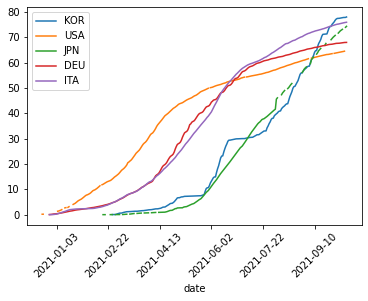

In [310]:
# 일차 접종 완료 비율
people_vaccinated_per_hundred = make_our_world_df('people_vaccinated_per_hundred')
people_vaccinated_per_hundred.plot(rot = 45);

- 일차 접종 완료 비율: 
    - 한국, 일본은 백신 접종의 시작이 늦었음
    - 확진자 수가 적어 상대적으로 늦게 백신 접종을 시작한 것으로 보임
    - 2021년 6월 이후 빠르게 다른 국가를 따라가 최근 시점엔 접종 비율이 더 높음
    - 미국은 초기 접종률은 높으나 증가율이 감소하면서 최근 시점엔 가장 접종 비율이 낮음

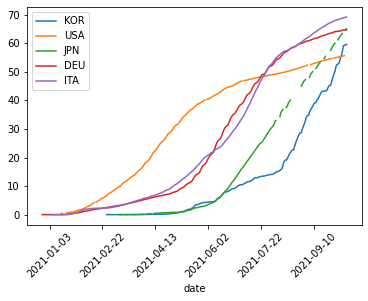

In [308]:
# 최종 접종 완료 비율
people_fully_vaccinated_per_hundred = make_our_world_df('people_fully_vaccinated_per_hundred')
people_fully_vaccinated_per_hundred.plot(rot = 45);

- 최종 접종 완료 비율: 
    - 일차 접종 완료 비율과 비슷한 추세를 보임

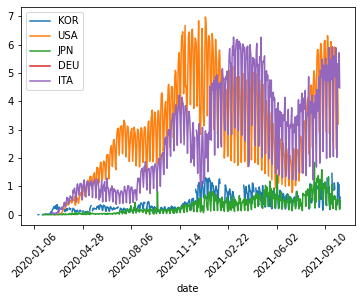

In [317]:
# 신규 코로나 검사 비율(1000명 당)
new_tests_per_thousand = make_our_world_df('new_tests_per_thousand')
new_tests_per_thousand.plot(rot = 45);

- 신규 코로나 검사 비율(1000명 당):
    - 신규 확진자 수와 비슷한 추세
    - 확진자가 많을 수록 검사 비율도 높음

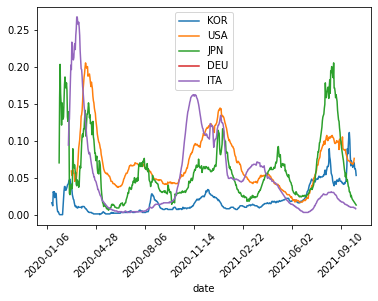

In [309]:
# 검사 대비 확진자 비율
positive_rate = make_our_world_df('positive_rate')
positive_rate.plot(rot = 45);

- 검사 대비 확진자 비율:
    - 낮을 수록 선제적 검사를 수행하는 것으로 해석 가능.
    - 대한민국은 전체적으로 낮은 수준을 유지하고 있으니, 조금씩 증가하는 추세가 보임

## 6.4 종합의견

- 최근 확진자 수가 급증하고 있으나, 대한민국은 지금까지 다른 국가 대비 코로나 방역을 잘 수행하는 것으로 판단
    - 절대적인 확진자 수, 인구 대비 확진자 비율, 확진자 대비 사망자 비율, 검사대비 확진자 비율 등에서 가장 우수한 수치를 갖음
    - 백신 접종 비율이 낮다는 비판이 있으나, 확진자 수가 작아 급하게 대응하지 않았던 것으로 보임
        - 백신 접종이 시작된 2020년 말 이후에도 확진자 수 등이 역전되지 않음
        - 누적 확진자 대비 누적 사망자 비율도 다른나라와 큰 차이가 없음
    - 이러한 방역의 성과는 방역 절차 뿐 아니라 다른 요인에도 영향을 받은 것으로 보임
        - 개인성향 지수와 확진자 간 양의 상관관계가 있음

# 문제7 - 국가별 의료 수준의 수치화
- 보건복지부에서 제공하는 OECD Health Satistics 2020 활용(pdf 파일이라 노가다로 입력)
- https://www.korea.kr/archive/expDocView.do?docId=39200#:~:text=OECD%20Health%20Statistics%202020(%EC%9A%94%EC%95%BD%EB%B3%B8).pdf
    - OECD국가를 대상으로 건강상태, 보건의료자원, 보건의료비용 등을 수치로 보여줌
    - 이 중 몇가지 항목을 선택하여 5개 국가의 랭킹을 표시하고(낮을수록 좋음) 랭킹 합계를 의료 수준으로 가정
        - 항목 및 국가의 순위는 아래와 같음(대한민국, 미국, 일본, 독일, 이탈리아 순)
            - 기대수명: 10, 29, 1, 25, 4
            - 암에 의한 사망률: 3, 9, 5, 20 ,17
            - 총 병원 병상 수 : 2, 27, 1, 3, 23
            - 임상 의사 수: 29, 26, 27,5, 10
            - CT 보유 수: 8, 4, 1, 10, 11
    - 위 순위는 OEDC 전체 국가에서의 랭킹(절대랭킹)
    - 5국가만의 랭킹을 따로 구해서(상대랭킹) 절대랭킹과 상대랭킹의 합계로 최종 순위를 결정
        - 절대랭킹은 전반적으로 등수가 높은데 한 군데서 순위가 확 낮아지면 페널티가 큼
        - 이를 보완하기 위해 상대랭킹을 같이 사용

In [331]:
# 절대 순위 계산
expected_life = [10, 29, 1, 25, 2]
cancer_death = [3, 9, 5, 20 ,17]
beds_nbr = [29, 26, 27,5, 10]
doctor_nbr = [29, 26, 27,5, 10]
ct_nbr = [8, 4, 1, 10, 11]
absol_rank_df = pd.DataFrame({
    '기대수명': expected_life,
    '암사망률': cancer_death,
    '병상수' : beds_nbr,
    'CT수' : ct_nbr,
    '의료비비율' : medical_exp_rto
    }, index = ['KOR', 'USA', 'JPN', 'DEU', 'ITA']
)
absol_rank_df

기대수명  암사망률  병상수  CT수  의료비비율
KOR    10     3   29    8      5
USA    29     9   26    4      1
JPN     1     5   27    1      3
DEU    25    20    5   10      2
ITA     2    17   10   11      4

In [347]:
absol_rank_df2 = absol_rank_df.sum(axis=1).sort_values()
absol_rank_df3 = absol_rank_df2.rank()
absol_rank_df3

JPN    1.0
ITA    2.0
KOR    3.0
DEU    4.0
USA    5.0
dtype: float64

In [333]:
# 상대 순위 계산
expected_life = [3, 5, 1, 4, 2]
cancer_death = [1, 3, 2, 5 ,4]
beds_nbr = [5, 3, 4, 1, 2]
doctor_nbr = [5, 3, 4, 1, 2]
ct_nbr = [3, 2, 1, 4, 5]

related_rank_df = pd.DataFrame({
    '기대수명': expected_life,
    '암사망률': cancer_death,
    '병상수' : beds_nbr,
    'CT수' : ct_nbr
    }, index = ['KOR', 'USA', 'JPN', 'DEU', 'ITA']
)
related_rank_df

기대수명  암사망률  병상수  CT수
KOR     3     1    5    3
USA     5     3    3    2
JPN     1     2    4    1
DEU     4     5    1    4
ITA     2     4    2    5

In [348]:
related_rank_df2 = related_rank_df.sum(axis=1).sort_values()
related_rank_df3 = related_rank_df2.rank()
related_rank_df3

JPN    1.0
KOR    2.0
USA    3.5
ITA    3.5
DEU    5.0
dtype: float64

In [346]:
final_rank = related_rank_df3 + absol_rank_df3
final_rank.rank().sort_values()

JPN    1.0
KOR    2.0
ITA    3.0
USA    4.0
DEU    5.0
dtype: float64

- 주관적이지만 일본->대한민국->이탈리아->미국->독일 순으로 의료수준이 좋은 것으로 판단
- 확진자 수의 비율은 미국->이탈리아->독일->일본->대한민국 이었음
    - 대체로 의료수준과 확진자 수의 비율이 역순으로 보이지만 표본이 작아 결론을 내기는 힘들 것 같음

- 추가로 (확진자/인구)를 (병상수/인구)로 나누면 (확진자/병상수)= 병상 수 대비 확진자 수가 됨
- 이를 확진자 대비 사망자 비율과 비교해 보자
- 대한민국, 미국, 일본, 독일, 이탈리아의 인구 대비 병상수는 12.4, 2.9, 13, 8, 3.1 임 (1000명당)

In [359]:
# 인구 대비 누적확진자 비율
confirmed_ratio = confirmed_ratio_total.iloc[-1]
del confirmed_ratio['Total']
confirmed_ratio

Germany          5.193800
Italy            7.895070
Japan            1.360602
Korea, South     0.645344
US              13.492592
Name: 2021-10-11 00:00:00, dtype: float64

In [361]:
# 인구 대비 병상수
beds_nbr = [12.4, 2.9, 13, 8, 3.1]
beds_nbr = pd.Series(beds_nbr, index=confirmed_ratio.index)
beds_nbr

Germany         12.4
Italy            2.9
Japan           13.0
Korea, South     8.0
US               3.1
dtype: float64

In [363]:
# 병상수 대비 확진자 수
confirmed_beds_ratio = confirmed_ratio / beds_nbr
confirmed_beds_ratio

Germany         0.418855
Italy           2.722438
Japan           0.104662
Korea, South    0.080668
US              4.352449
dtype: float64

In [382]:
# 인구 대비 사망자 비율
death_confirmed_ratio2 = death_confirmed_ratio.iloc[-1]
del death_confirmed_ratio2['Total']
death_confirmed_ratio2

Country/Region
Germany         0.021814
Italy           0.027933
Japan           0.010497
Korea, South    0.007763
US              0.016062
Name: 2021-10-11 00:00:00, dtype: float64

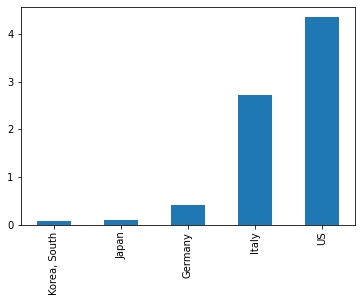

In [380]:
# 병상수 대비 확진자 수 bar 그래프
confirmed_beds_ratio.sort_values().plot.bar();

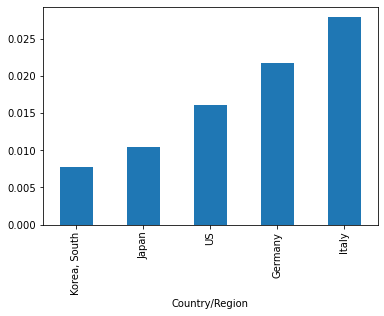

In [384]:
# 누적 확진자 대비 누적 사망자 비율 bar 그래프
death_confirmed_ratio2.sort_values().plot.bar();

 - 병상수 대비 확진자 비율과 누적 확진자 대비 누적 사망자 비율을 비교하면
     - 대한민국과 일본은 순위를 유지
     - 나머지 국가는 순위가 변동 됨
     - 표본은 작지만 의료수준 순위와 인구대비 확진자 또는 병상수 대비 확진자 비율은 비슷한 결과를 보이고 있음
         - 그러나 누적 확진자 대비 누적 사망자 비율은 미국, 독일, 이탈리아의 순위가 변동되어 강하게 주장하기는 힘들 것 같음.